In [127]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="darkgrid", font='Verdana', color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

---

In [136]:
# I am going to leave this here because it is interesting
greenhouse_int = get_int('greenhouse', '2000-01-01 2020-05-16')

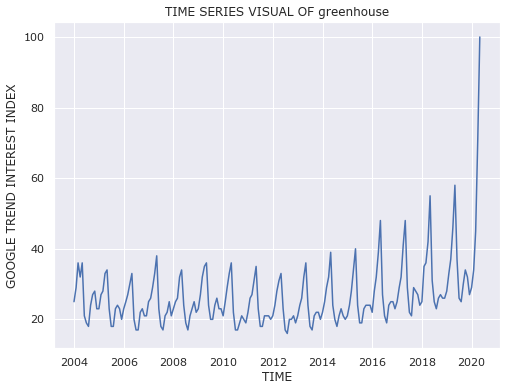

In [137]:
nice_plot(greenhouse_int, 'greenhouse')

In [138]:
sarima_gs(greenhouse_int['2004':'2014'], 'greenhouse')

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=578.208, BIC=582.972, Time=0.143 seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=530.532, BIC=540.060, Time=3.714 seconds
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=521.939, BIC=531.468, Time=5.084 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=577.323, BIC=579.705, Time=0.130 seconds
Fit ARIMA(1,0,0)x(0,1,0,52) [intercept=True]; AIC=539.849, BIC=546.995, Time=0.412 seconds
Fit ARIMA(1,0,0)x(2,1,0,52) [intercept=True]; AIC=532.532, BIC=544.442, Time=14.214 seconds
Fit ARIMA(1,0,0)x(1,1,1,52) [intercept=True]; AIC=532.532, BIC=544.442, Time=6.581 seconds
Fit ARIMA(1,0,0)x(0,1,1,52) [intercept=True]; AIC=530.647, BIC=540.175, Time=12.522 seconds
Near non-invertible roots for order (1, 0, 0)(0, 1, 1, 52); setting

KeyboardInterrupt: 

---

In [64]:
# Using a custom function to utilize pytrends to get me the interest index
## From Google Trends Pseudo-API over a specified period of time
### Timeframe format --> 'YYYY-MM-DD YYYY-MM-DD' --> 'early recent'
# This one got '2000-01-01 current_date'
# indoor_farming = get_int('indoor farming', '2000-01-01 2020-05-16')

# Saved the csv before
indoor_farming = pd.read_csv('indoor_farming_interest')

In [3]:
# Saving this data
# indoor_farming_int.to_csv('indoor_farming_interest')

In [65]:
indoor_farming['date'] = pd.to_datetime(indoor_farming['date'])
indoor_farming.set_index('date', inplace=True)

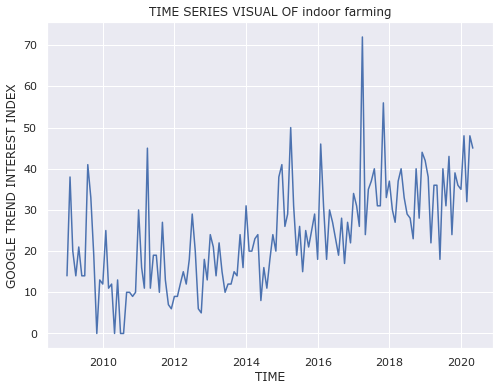

In [60]:
# Going to use my nice_plot() function to make a time series visual
nice_plot(indoor_farming['2009':], 'indoor farming')

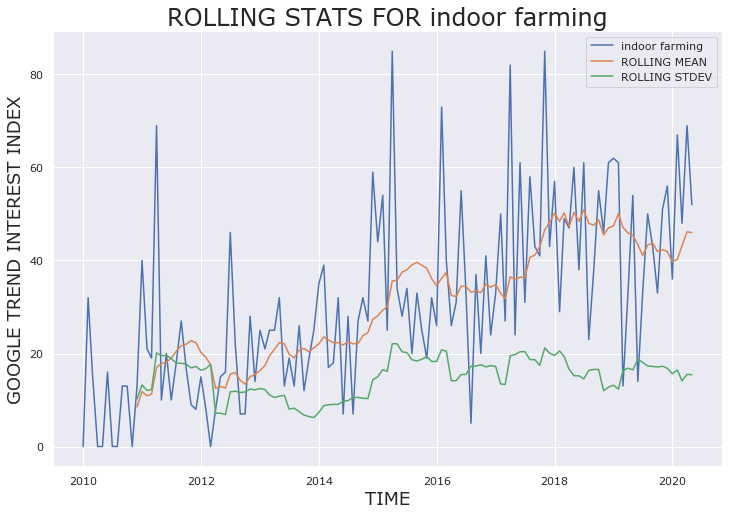

In [139]:
rolling_stats(indoor_farming['2010':],'indoor farming',12)

In [140]:
gen_dftest(indoor_farming['2010':], 'indoor farming')

Test Stat                -0.865804
P-Value                   0.799025
# Lags                   13.000000
# Observations          111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64

Time series is not stationary

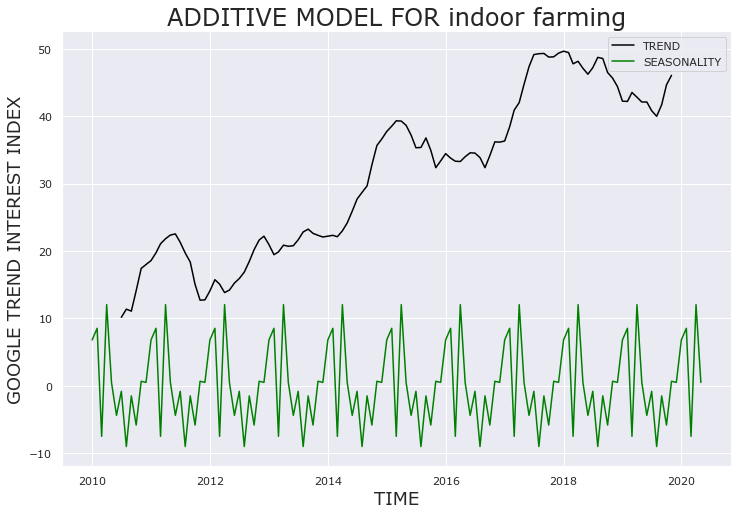

In [141]:
szn_decomp(indoor_farming['2010':], 'indoor farming', model=['additive'],
           graphs=['trend', 'szn'])

Clearly some seasonality here

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

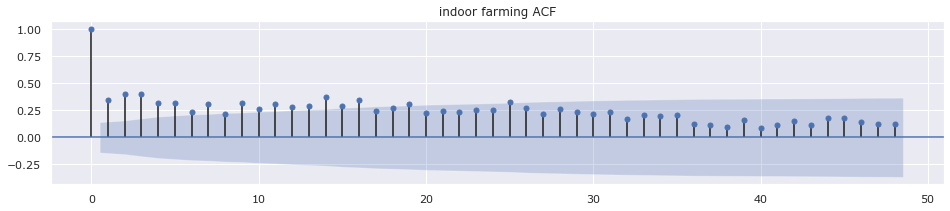

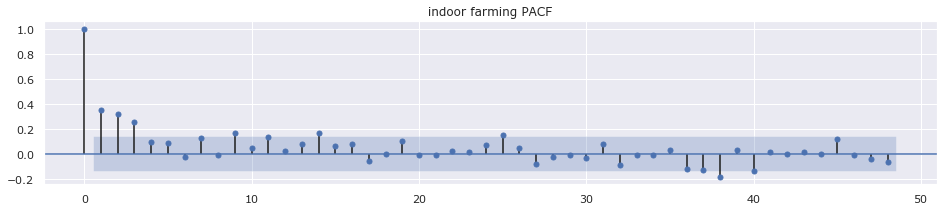

In [142]:
auto_corrs(indoor_farming, 'indoor farming')

----

In [143]:
urban_ag_int = get_int('urban agriculture', '2000-01-01 2020-05-16')
urban_ag_int.to_csv('urban_farming_interest')

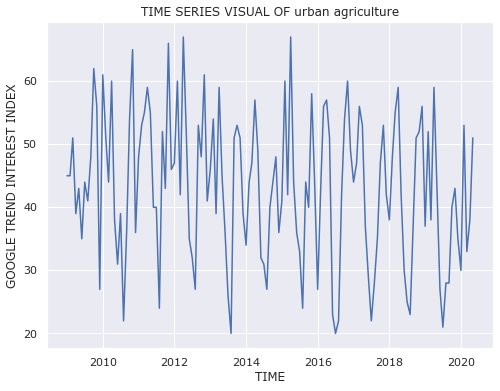

In [5]:
nice_plot(urban_ag_int['2009':], 'urban agriculture')

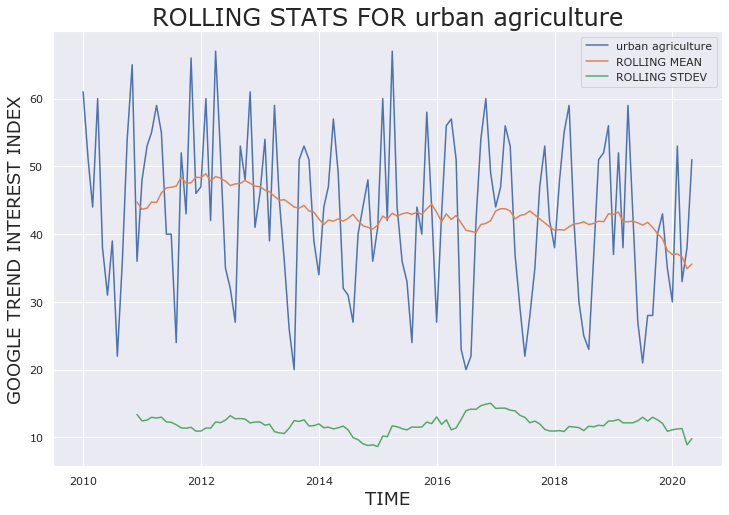

In [6]:
rolling_stats(urban_ag_int['2010':],'urban agriculture',12)

In [7]:
gen_dftest(urban_ag_int['2010':],'urban agriculture')

Test Stat                -0.525792
P-Value                   0.886884
# Lags                   11.000000
# Observations          113.000000
Critical Value (1%)      -3.489590
Critical Value (5%)      -2.887477
Critical Value (10%)     -2.580604
dtype: float64

This time series is also not stationary

In [8]:
urban_ag_log = np.log(urban_ag_int)
gen_dftest(urban_ag_log['2010':], 'urban agriculture')

Test Stat                -0.488904
P-Value                   0.894164
# Lags                   11.000000
# Observations          113.000000
Critical Value (1%)      -3.489590
Critical Value (5%)      -2.887477
Critical Value (10%)     -2.580604
dtype: float64

Even a log transformation doesn't do anything

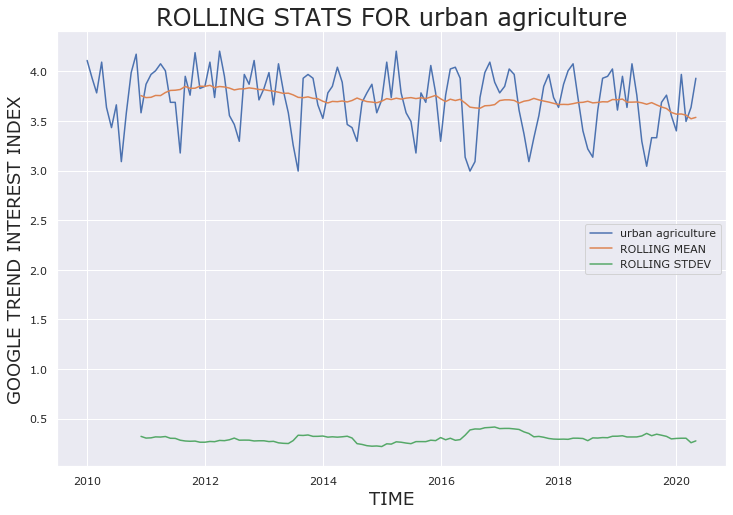

In [9]:
rolling_stats(urban_ag_log['2010':],'urban agriculture',12)

Log trans def helps out with the graphing. More normalized.

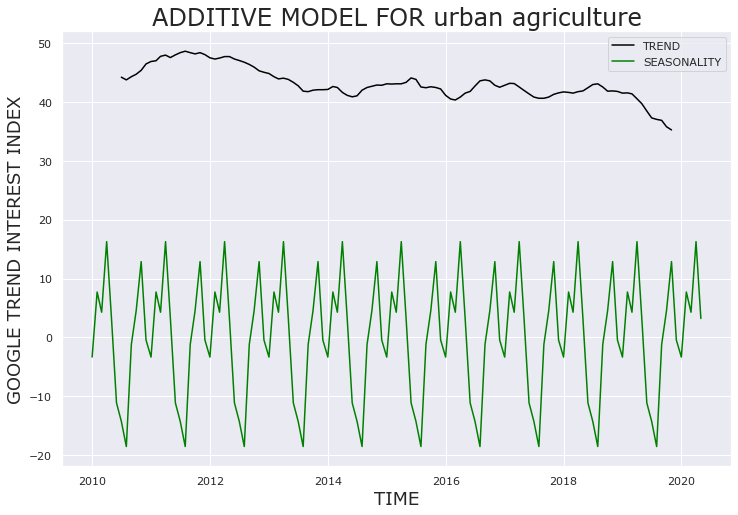

In [10]:
szn_decomp(urban_ag_int['2010':], 'urban agriculture', model=['additive'],
           graphs=['trend', 'szn'])

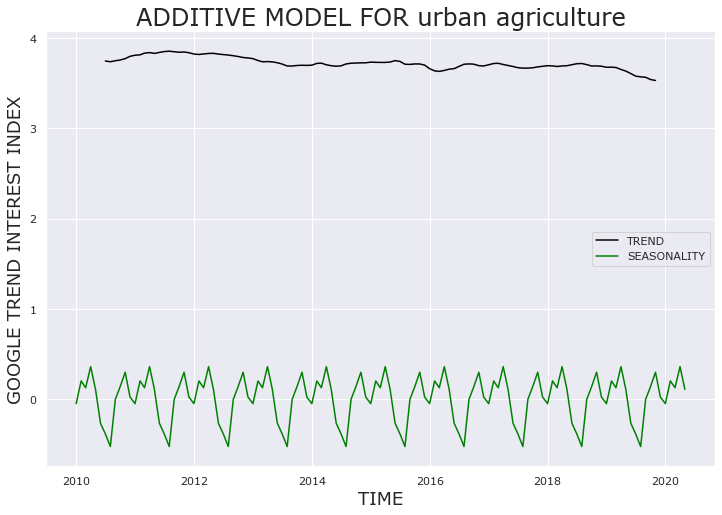

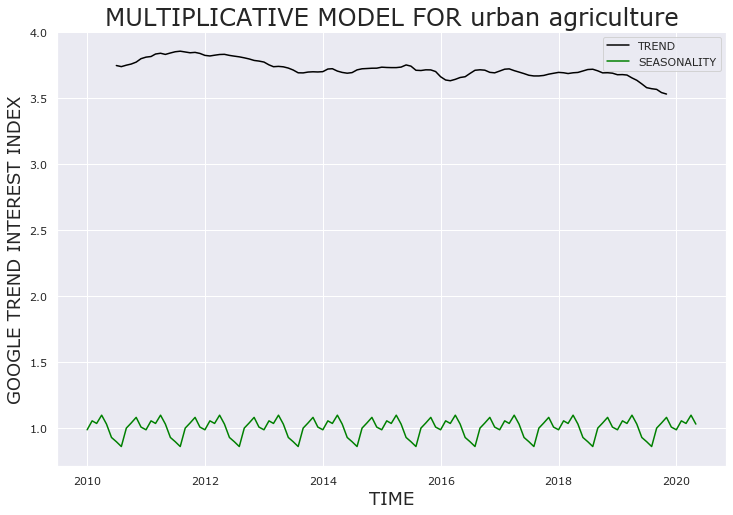

In [12]:
szn_decomp(urban_ag_log['2010':], 'urban agriculture', model=['additive', 'multiplicative'],
           graphs=['trend', 'szn'])

Log transformation definitely helps to normalize the overall shape and stats of the data. The seasonality, while still present, appears visually less extreme.

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

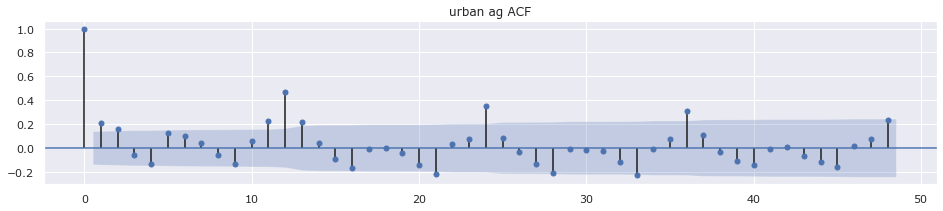

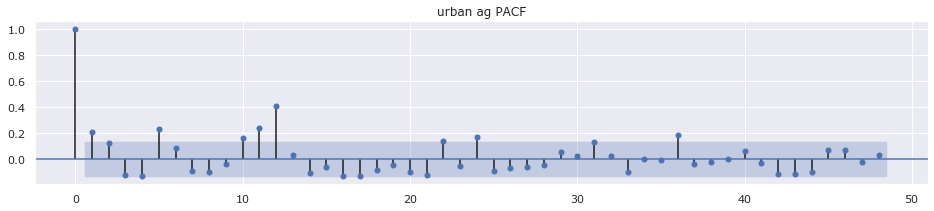

In [18]:
auto_corrs(urban_ag_int, 'urban ag')

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

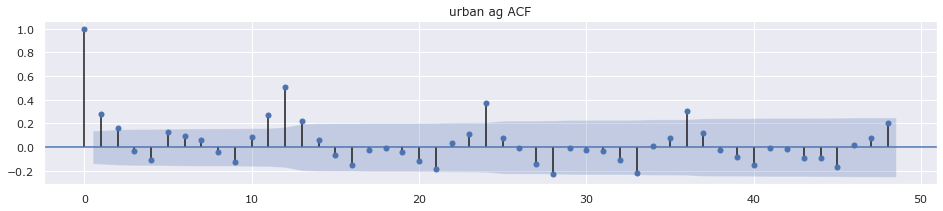

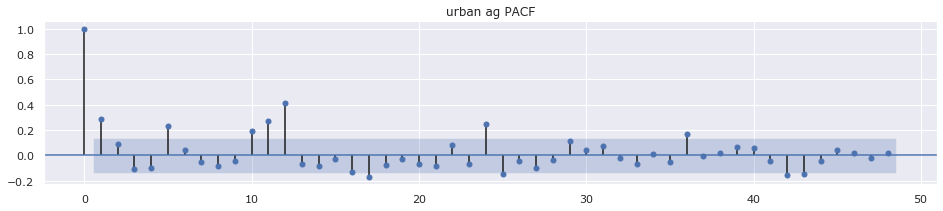

In [19]:
auto_corrs(urban_ag_log, 'urban ag')

---

First do the final modeling, then look into related terms, get the interest ratings, and start to add and average. Might be good, not sure. Just an idea.

---

## Modeling using `auto_arima` 

In [15]:
indoor_farming['2010':'2015'].head()


,indoor farming
date,
2010-01-01,0
2010-02-01,32
2010-03-01,15
2010-04-01,0
2010-05-01,0


In [128]:
def test_plot(data,keyword):
    fig,ax = plt.subplots(figsize=(16,8))
    sns.lineplot(x=data['2010':'2015'].index,
                 y=data['2010':'2015']['indoor farming'],
                label='TRAINING', color='green')
    sns.lineplot(x=data['2016':].index,
                 y=data['2016':]['indoor farming'],
                 label='VALIDATION', color='orange')
    sns.lineplot(x=forecast.index, y=forecast['Prediction'], label='PREDICTIONS', color='black')
    plt.legend(['TRAINING DATA', 'PREDICTIONS', 'ACTUAL'], loc='best')
    plt.xlabel('TIME',size=18)
    plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
    plt.title(f'BEST SARIMA MODEL FOR %s'%keyword, size=24)
    plt.show()

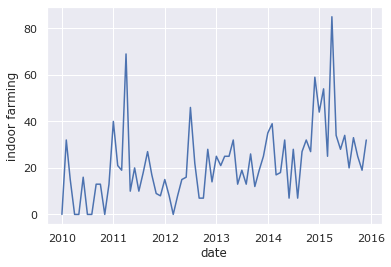

In [16]:
sns.lineplot(x=indoor_farming['2010':'2015'].index, y=indoor_farming['2010':'2015']['indoor farming'])

Really happy to see the `auto_arima` working so well, and that I am able to incorporate the seasonal component into the modeling. Will definitely be looking further into this over the weekend.  
  
Would really like now to shift gears and look into sentiment analysis with `VADER` on the tweets that I have scraped. This can be used as an exogenous variable for my time series.

Another good step to take is to get all of these fitting parameters into a data frame so the graph is easily reproducible... or just reformat how the graph comes out. That might be the better option. Create a function to run auto_arima and output a nice looking graph with titles, etc...

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                     indoor farming   No. Observations:                   72
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 52)   Log Likelihood                -288.818
Date:                            Sun, 17 May 2020   AIC                            591.637
Time:                                    15:39:10   BIC                            607.475
Sample:                                01-01-2010   HQIC                           597.935
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0076      0.007      1.090      0.276      -0.006       0.021
ar.L1          0.0770      0.186   

Text(0.5, 1.0, 'BEST SARIMA MODEL FOR indoor farming')

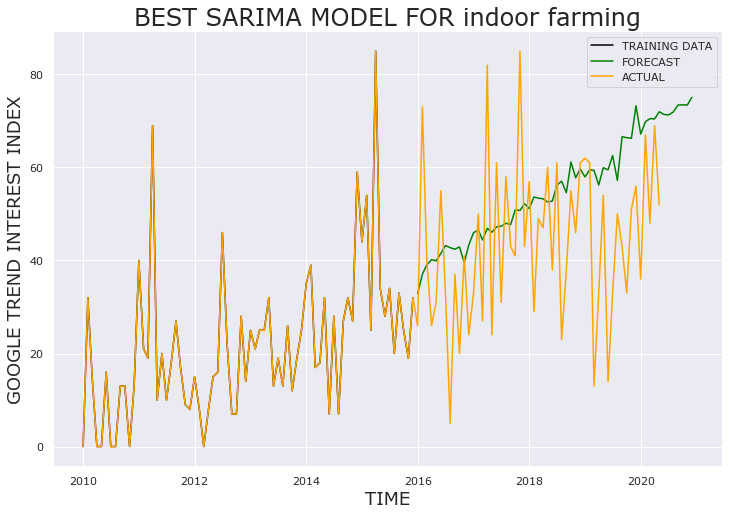

In [96]:
model = SARIMAX(indoor_farming_int['2010':'2015'], order=(2,1,1), seasonal_order=(1, 0, 1, 52),
                trend='t')
fit = model.fit()
print(fit.summary())
forecast = fit.forecast(60)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=indoor_farming_int['2010':'2015'].index,
             y=indoor_farming_int['2010':'2015']['indoor farming'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=indoor_farming_int['2010':].index,
             y=indoor_farming_int['2010':]['indoor farming'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'BEST SARIMA MODEL FOR indoor farming', size=24)

Going to look into some more stepwise implementation of `auto arima`

In [151]:
model = auto_arima(indoor_farming['2010':'2015'], trace=True, start_p=0, start_q=0,
                  start_P=0, start_Q=0, seasonal=True, m=52, suppress_warnings=True, 
                   D=1, error_action='ignore', approximation=False, random_state=42,
                   out_of_sample_size=45)
fitted = model.fit(indoor_farming['2010':'2015'])

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=1194.315, BIC=1198.298, Time=1.535 seconds
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=1251.493, BIC=1255.476, Time=1.605 seconds
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=nan, BIC=nan, Time=nan seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:4161: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


Fit ARIMA(1,0,0)x(0,1,0,52) [intercept=True]; AIC=1196.584, BIC=1199.572, Time=0.286 seconds
Fit ARIMA(1,0,0)x(2,1,0,52) [intercept=True]; AIC=1192.223, BIC=1197.202, Time=6.053 seconds
Fit ARIMA(1,0,0)x(2,1,1,52) [intercept=True]; AIC=1155.145, BIC=1161.120, Time=7.044 seconds
Fit ARIMA(1,0,0)x(1,1,1,52) [intercept=True]; AIC=1157.339, BIC=1162.318, Time=2.078 seconds
Fit ARIMA(1,0,0)x(2,1,2,52) [intercept=True]; AIC=1113.216, BIC=1120.186, Time=8.846 seconds
Fit ARIMA(1,0,0)x(1,1,2,52) [intercept=True]; AIC=1158.998, BIC=1164.972, Time=7.349 seconds
Fit ARIMA(0,0,0)x(2,1,2,52) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(2,0,0)x(2,1,2,52) [intercept=True]; AIC=1049.818, BIC=1057.783, Time=10.031 seconds
Fit ARIMA(2,0,0)x(1,1,2,52) [intercept=True]; AIC=1055.880, BIC=1062.851, Time=8.685 seconds
Fit ARIMA(2,0,0)x(2,1,1,52) [intercept=True]; AIC=1055.314, BIC=1062.284, Time=9.595 seconds
Fit ARIMA(2,0,0)x(1,1,1,52) [intercept=True]; AIC=1053.947, BIC=1059.921, Time=2.

In [152]:
fitted.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 0, 0),
 'out_of_sample_size': 45,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (1, 1, 1, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

The reproducible results have been the orders described above from the search.  
(3,0,0) x (1,1,1,52)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                      SARIMAX Results                                       
Dep. Variable:                       indoor farming   No. Observations:                   72
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 52)   Log Likelihood                 -92.893
Date:                              Sun, 17 May 2020   AIC                            197.786
Time:                                      23:31:32   BIC                            203.760
Sample:                                  01-01-2010   HQIC                           198.952
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0007      0.312     -0.002      0.998      -0.611       0.610
ar.L2          0.40

Text(0.5, 1.0, 'BEST SARIMA MODEL FOR indoor farming')

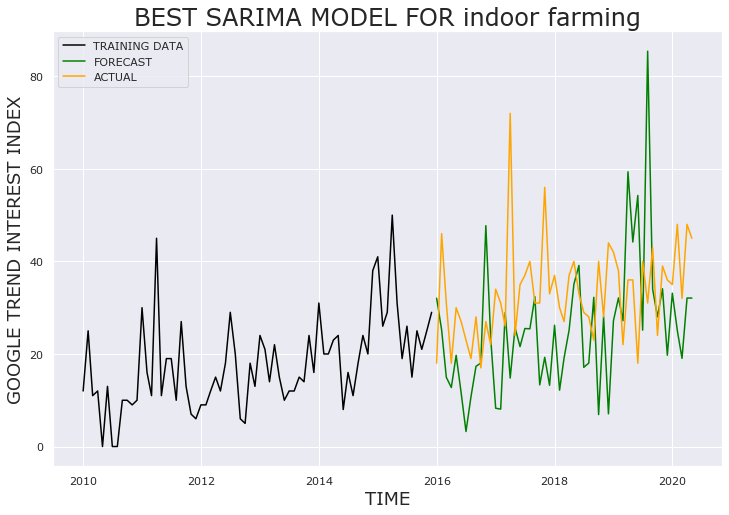

In [153]:
model = SARIMAX(indoor_farming['2010':'2015']['indoor farming'], order=(3,0,0),
                seasonal_order=(1, 1, 1, 52))
fit = model.fit()
print(fit.summary())
forecast = fit.forecast(53)
print('Forecasting 53 months into the future from the\ntraining data (2018-2020).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=indoor_farming_int['2010':'2015'].index,
             y=indoor_farming_int['2010':'2015']['indoor farming'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=indoor_farming_int['2016':].index,
             y=indoor_farming_int['2016':]['indoor farming'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'BEST SARIMA MODEL FOR indoor farming', size=24)

In [154]:
mse = mean_squared_error(indoor_farming_int['2016':]['indoor farming'], forecast['forecast'])

In [155]:
rmse = np.sqrt(mse)
rmse

19.273173343259458

---

Ready for LSTM implementation...